In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('review.csv')
df.shape

(50000, 2)

In [3]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Text Cleaning

In [4]:
#sample random 2000 rows
df=df.sample(2000)
df.shape

(2000, 2)

In [5]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df.head()

,review,sentiment
30495,This movie is brilliant in every way. It touch...,1
18217,"The plot of 'Edison' was decent, but one actor...",0
29723,"This is a excellent series. You will laugh, yo...",1
30345,So we're supposed to find it funny that this w...,0
44937,STAR RATING: ***** Saturday Night **** Friday ...,0


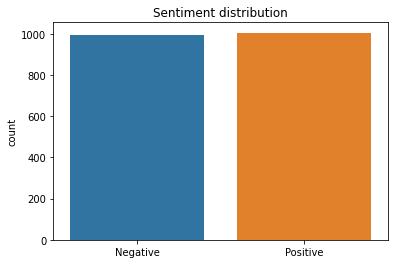

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
f = sns.countplot(x='sentiment', data=df)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

In [7]:
df.iloc[1].review

"The plot of 'Edison' was decent, but one actor in particular ruined the entire film. Justin Timberlake ruined the film with every line he uttered during the movie. He is by far one of the worst actors I have ever seen, and should face the same fate as the entire F.R.A.T. squad. <br /><br />Whether it was an emotional scene, an action scene, or even a silent scene, Justin Timberlake managed to ruin it. <br /><br />Do not waste your time watching this film. Don't even bother downloading it, midget porn would be a much better choice.<br /><br />And Justin, if you're reading this, stick to music. Even though you're no good at that, you've done a wonderful job tricking people into thinking you can actually sing."

In [8]:
#removing html tags
import re
clean = re.compile('<.*?>')
re.sub(clean,'',df.iloc[1].review)

"The plot of 'Edison' was decent, but one actor in particular ruined the entire film. Justin Timberlake ruined the film with every line he uttered during the movie. He is by far one of the worst actors I have ever seen, and should face the same fate as the entire F.R.A.T. squad. Whether it was an emotional scene, an action scene, or even a silent scene, Justin Timberlake managed to ruin it. Do not waste your time watching this film. Don't even bother downloading it, midget porn would be a much better choice.And Justin, if you're reading this, stick to music. Even though you're no good at that, you've done a wonderful job tricking people into thinking you can actually sing."

In [9]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [10]:
df['review'] = df['review'].apply(clean_html)

In [11]:
#convert to lowercase
def conv_low(text):
    return text.lower()

In [12]:
df['review'] = df['review'].apply(conv_low)

In [13]:
#remove special characters
def rem_special(text):
    x = ''
    for i in text:
        if i.isalnum(): #check if "i" is alpha numeric 
            x = x + i
        else:
            x = x + ' '
    return x

In [14]:
rem_special('t@he $$ king i&*n the north')

't he    king i  n the north'

In [15]:
df['review'] = df['review'].apply(rem_special)
df1 = df

In [16]:
#remove stop word (words like: and, a, if)
import nltk

In [17]:
from nltk.corpus import stopwords #stopwords is a class

In [18]:
def rem_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y = x[:]
    x.clear()
    return y

In [19]:
df1['review'] = df1['review'].apply(rem_stopwords)
df2 = df1
df2

,review,sentiment
30495,"[movie, brilliant, every, way, touches, comple...",1
18217,"[plot, edison, decent, one, actor, particular,...",0
29723,"[excellent, series, laugh, cry, wonderful, peo...",1
30345,"[supposed, find, funny, woman, travels, way, j...",0
44937,"[star, rating, saturday, night, friday, night,...",0
...,...,...
9673,"[loonatics, unleashed, worst, thing, could, ha...",0
8912,"[dolph, lundgren, stars, templar, comes, new, ...",0
47007,"[whatever, become, life, must, never, forget, ...",1
37812,"[sad, say, film, truly, awful, one, tries, fin...",0


In [20]:
#perform stemming (convert v1,v3,v4,v5 to v2)
from nltk.stem import WordNetLemmatizer, PorterStemmer
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [21]:

def stem_words(text):
    y = []
    for i in text:
        y.append(wnl.lemmatize(i) if wnl.lemmatize(i).endswith('e') else ps.stem(i))
    z = y[:]
    y.clear()
    return z

In [22]:
lists =['i','loved','loving','it']
stem_words(lists)

['i', 'love', 'love', 'it']

In [23]:
df2['review'] = df2['review'].apply(stem_words)
df3 = df2
df3

,review,sentiment
30495,"[movie, brilliant, everi, way, touch, complex,...",1
18217,"[plot, edison, decent, one, actor, particular,...",0
29723,"[excel, seri, laugh, cri, wonder, people, part...",1
30345,"[suppos, find, funni, woman, travel, way, jung...",0
44937,"[star, rate, saturday, night, friday, night, f...",0
...,...,...
9673,"[loonat, unleash, worst, thing, could, happen,...",0
8912,"[dolph, lundgren, star, templar, come, new, yo...",0
47007,"[whatev, become, life, must, never, forget, ro...",1
37812,"[sad, say, film, truli, aw, one, tri, find, wa...",0


In [24]:
df3['review'] = [','.join(map(str, l)) for l in df3['review']] #convert list to string
df4 = df3
df4

,review,sentiment
30495,"movie,brilliant,everi,way,touch,complex,love,r...",1
18217,"plot,edison,decent,one,actor,particular,ruin,e...",0
29723,"excel,seri,laugh,cri,wonder,people,part,famili...",1
30345,"suppos,find,funni,woman,travel,way,jungle,warz...",0
44937,"star,rate,saturday,night,friday,night,friday,m...",0
...,...,...
9673,"loonat,unleash,worst,thing,could,happen,classi...",0
8912,"dolph,lundgren,star,templar,come,new,york,key,...",0
47007,"whatev,become,life,must,never,forget,root,stor...",1
37812,"sad,say,film,truli,aw,one,tri,find,way,around,...",0


### Create Bag of words

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

In [26]:
X = cv.fit_transform(df4['review']).toarray() #2000 reviews ma 18k word haru ko term frequency compute garera matrix generate
pickle.dump(cv, open('tranform.pkl', 'wb'))

In [27]:
X.shape

(2000, 18609)

In [28]:
y = df4.iloc[:,-1].values # y -> sentiment
y.shape

(2000,)

### Training and testing data

In [29]:
#taking X,y and spliting in training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(X)

(1600, 18609) (400, 18609) (1600,) (400,)


,0,1,2,3,4,5,6,7,8,9,...,18599,18600,18601,18602,18603,18604,18605,18606,18607,18608
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [32]:
clf1 = GaussianNB()
clf2 = MultinomialNB()

In [33]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [34]:
y_test.shape, y_pred1.shape, y_pred2.shape

((400,), (400,), (400,))

### Testing accuracy

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [36]:
print("GaussianNB has an accuracy of ",accuracy_score(y_test,y_pred1)*100,"%")
print("MultinomialNB has an accuracy of ",accuracy_score(y_test,y_pred2)*100,"%")

GaussianNB has an accuracy of  57.75 %
MultinomialNB has an accuracy of  83.75 %


In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, shuffle=True)
kf.get_n_splits(X)
print(kf) 

KFold(n_splits=6, random_state=None, shuffle=True)


In [38]:
scores1 = cross_val_score(clf1.fit(X_train,y_train), X, y, cv=kf)
print ("Cross-validated scores for Gaussian:", scores1)
scores2 = cross_val_score(clf2.fit(X_train,y_train), X, y, cv=kf)
print ("Cross-validated scores for Multinomial:", scores2)

Cross-validated scores for Gaussian: [0.61077844 0.60179641 0.63363363 0.56756757 0.58558559 0.58558559]
Cross-validated scores for Multinomial: [0.82335329 0.81137725 0.83483483 0.77177177 0.78978979 0.81681682]


In [39]:
accuracy1 = cross_val_score(clf1,X,y,scoring='accuracy',cv=kf)
print("Accuracy = ",round(100*accuracy1.mean(),5),'%')
accuracy2 = cross_val_score(clf2,X,y,scoring='accuracy',cv=kf)
print("Accuracy = ",round(100*accuracy2.mean(),5),'%')

Accuracy =  59.74867 %
Accuracy =  81.39936 %


In [40]:
filename = 'nlp_model.pkl'
pickle.dump(clf2, open(filename, 'wb'))

In [41]:
import itertools


 Confusion matrix, without normalization
[[177  33]
 [ 32 158]]


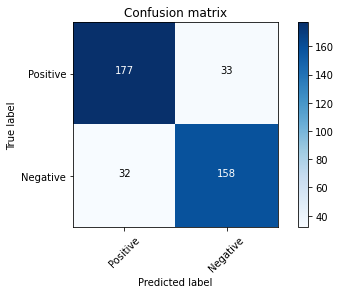

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('\n Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


cnf_matrix = metrics.confusion_matrix(y_test, y_pred2, labels =[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],normalize= False,title='Confusion matrix')

In [43]:
report = metrics.classification_report(y_test, y_pred2, output_dict=True)
print("Classification Report")
pd.DataFrame(report).transpose()

Classification Report


,precision,recall,f1-score,support
0,0.846890,0.842857,0.844869,210.0000
1,0.827225,0.831579,0.829396,190.0000
accuracy,0.837500,0.837500,0.837500,0.8375
macro avg,0.837058,0.837218,0.837133,400.0000
weighted avg,0.837549,0.837500,0.837519,400.0000
